In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 33 Lecture 2 Assignment

In this assignment, we will learn about non linear SVM models. We will use the heart disease dataset loaded below and analyze the model generated for this dataset.

In [2]:
import warnings

import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    make_scorer,
    f1_score,
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

<IPython.core.display.Javascript object>

In [4]:
heart = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/framingham_heart_disease.csv"
)

<IPython.core.display.Javascript object>

In [5]:
heart.shape

(4238, 16)

<IPython.core.display.Javascript object>

In [6]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<IPython.core.display.Javascript object>

In [7]:
heart["TenYearCHD"].value_counts(normalize=True)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

<IPython.core.display.Javascript object>

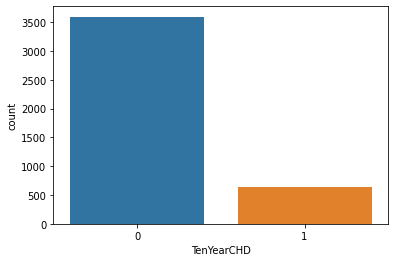

<IPython.core.display.Javascript object>

In [8]:
sns.countplot(heart["TenYearCHD"])
plt.show()

In [9]:
bin_cols = [
    "male",
    "currentSmoker",
    "BPMeds",
    "prevalentStroke",
    "prevalentHyp",
    "diabetes",
]

num_cols = [
    "age",
    "education",
    "cigsPerDay",
    "totChol",
    "sysBP",
    "diaBP",
    "BMI",
    "heartRate",
    "glucose",
]

<IPython.core.display.Javascript object>

This dataset helps us predict the probability of coronary heart diease (CHD) in the next 10 years given the risk factors for each subject in the study. Our target variable is `TenYearCHD`.

We'll start off by removing any rows containing missing data.

In [10]:
heart = heart.dropna()

<IPython.core.display.Javascript object>

Then, we split the data into train and test with 20% of the data in the test subset.

In [11]:
X = heart.drop(columns=["TenYearCHD"])
y = heart["TenYearCHD"]

<IPython.core.display.Javascript object>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [13]:
print_vif(X)

VIF results
-------------------------------
const              195.466213
male                 1.205618
age                  1.360426
education            1.055117
currentSmoker        2.584703
cigsPerDay           2.732307
BPMeds               1.111192
prevalentStroke      1.017432
prevalentHyp         2.050782
diabetes             1.615855
totChol              1.116326
sysBP                3.766837
diaBP                3.000192
BMI                  1.239749
heartRate            1.093360
glucose              1.637353
dtype: float64
-------------------------------



<IPython.core.display.Javascript object>

We will then scale the data using the standard scaler. Do this in the cell below.

Generate a polynomial SVC model and a RBF SVC model. Compare the performance, and the runtime, for the two models.

In [14]:
preprocessing = ColumnTransformer(
    [("scale", StandardScaler(), num_cols)], remainder="passthrough"
)

<IPython.core.display.Javascript object>

In [15]:
pipeline_ply = Pipeline(
    [("preprocessing", preprocessing), ("svm", SVC(kernel="poly", C=100))]
)

<IPython.core.display.Javascript object>

In [16]:
pipeline_rbf = Pipeline(
    [("preprocessing", preprocessing), ("svm", SVC(kernel="rbf", C=100))]
)

<IPython.core.display.Javascript object>

In [17]:
%%time
pipeline_ply.fit(X_train, y_train)

print(f'Train score {pipeline_ply.score(X_train, y_train)}')
print(f'Test score {pipeline_ply.score(X_test, y_test)}\n')

Train score 0.899452804377565
Test score 0.8114754098360656

CPU times: user 8.88 s, sys: 49.3 ms, total: 8.93 s
Wall time: 8.88 s


<IPython.core.display.Javascript object>

In [18]:
y_pred = pipeline_ply.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[578,  32],
       [106,  16]])

<IPython.core.display.Javascript object>

In [19]:
%%time
pipeline_rbf.fit(X_train, y_train)

print(f'Train score {pipeline_rbf.score(X_train, y_train)}')
print(f'Test score {pipeline_rbf.score(X_test, y_test)}\n')

Train score 0.9661422708618331
Test score 0.7800546448087432

CPU times: user 866 ms, sys: 7.11 ms, total: 873 ms
Wall time: 880 ms


<IPython.core.display.Javascript object>

In [20]:
y_pred = pipeline_rbf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[543,  67],
       [ 94,  28]])

<IPython.core.display.Javascript object>

Which model overfits more? How would you improve the overfitting?

In [21]:
# Poly is more overfit, and more likely to predict majority class.
# Perhaps we vary levels of C to see how it effects performance.

<IPython.core.display.Javascript object>

In [22]:
pipeline = Pipeline([("preprocessing", preprocessing), ("svm", SVC())])

<IPython.core.display.Javascript object>

In [23]:
# Excluded kernel from the grid becuase poly kernel with higher levels
# of C was taking too long to fit.  RBF seems to fit better in this case
# and it fits significantly faster.
grid = {
    "svm__C": [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
}

# Using f1 might be a better metric than accuracy here since we have imbalanced data
pipeline_cv = GridSearchCV(
    pipeline, grid, verbose=1, cv=2, scoring=make_scorer(f1_score), n_jobs=-1
)
pipeline_cv.fit(X_train, y_train)

pipeline_cv.best_params_

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    3.8s finished


{'svm__C': 100}

<IPython.core.display.Javascript object>

In [24]:
print(f"Train score {pipeline_cv.score(X_train, y_train)}")
print(f"Test score {pipeline_cv.score(X_test, y_test)}\n")

Train score 0.872258064516129
Test score 0.25806451612903225



<IPython.core.display.Javascript object>

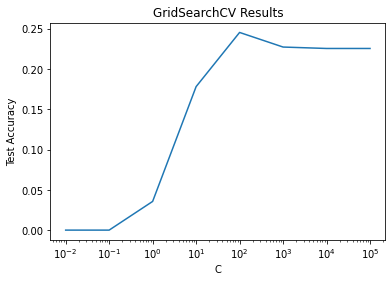

<IPython.core.display.Javascript object>

In [25]:
plt.plot(
    [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    pipeline_cv.cv_results_["mean_test_score"],
)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Test Accuracy")
plt.title("GridSearchCV Results")
plt.show()

Look at a classification report and confusion matrix. How does the class balance affect your results?

In [26]:
y_pred = pipeline_cv.predict(X_test)

<IPython.core.display.Javascript object>

In [27]:
f1_score(y_test, y_pred)

0.25806451612903225

<IPython.core.display.Javascript object>

In [28]:
confusion_df = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=["Actually 0", "Actually 1",],
    columns=["Predicted 1", "Predicted 0",],
)

confusion_df.style.background_gradient(axis=None)

,Predicted 1,Predicted 0
Actually 0,543,67
Actually 1,94,28


<IPython.core.display.Javascript object>

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       610
           1       0.29      0.23      0.26       122

    accuracy                           0.78       732
   macro avg       0.57      0.56      0.56       732
weighted avg       0.76      0.78      0.77       732



<IPython.core.display.Javascript object>